In [118]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [119]:


df = pd.read_csv("data\movies_project_final_dataset.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\AL LEWAA\AppData\Local\Temp\ipykernel_13268\1656696412.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv("data\movies_project_final_dataset.csv")


,Release Date,Title,Budget,Domestic Gross,Worldwide Gross,Year,Rating,Vote Count,Language,Season,Critic_Score,Audience_Score,runtime,genres,content_rating
0,2019-04-23,Avengers: Endgame,400000000.0,858373000.0,2.717504e+09,2019.0,8.237,26987,en,Spring,94.0,90.0,181.0,"Action & Adventure, Drama, Science Fiction & F...",PG-13
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000.0,241071802.0,1.045714e+09,2011.0,6.563,14607,en,Spring,33.0,54.0,136.0,"Action & Adventure, Comedy, Science Fiction & ...",PG-13
2,2015-04-22,Avengers: Age of Ultron,365000000.0,459005868.0,1.395317e+09,2015.0,7.271,23894,en,Spring,76.0,83.0,141.0,"Action & Adventure, Science Fiction & Fantasy",PG-13
3,2018-05-23,Solo: A Star Wars Story,330400000.0,213767512.0,3.931513e+08,2018.0,6.559,9020,en,Spring,70.0,64.0,135.0,"Action & Adventure, Drama, Science Fiction & F...",PG-13
4,2018-04-25,Avengers: Infinity War,300000000.0,678815482.0,2.048158e+09,2018.0,8.235,31196,en,Spring,85.0,91.0,149.0,"Action & Adventure, Science Fiction & Fantasy",PG-13


In [120]:
print("Dataset shape after preprocessing:", df.shape)
print(df.info())

Dataset shape after preprocessing: (1983, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Release Date     1983 non-null   object 
 1   Title            1983 non-null   object 
 2   Budget           1983 non-null   float64
 3   Domestic Gross   1983 non-null   float64
 4   Worldwide Gross  1983 non-null   float64
 5   Year             1983 non-null   float64
 6   Rating           1983 non-null   float64
 7   Vote Count       1983 non-null   int64  
 8   Language         1983 non-null   object 
 9   Season           1983 non-null   object 
 10  Critic_Score     1983 non-null   float64
 11  Audience_Score   1983 non-null   float64
 12  runtime          1983 non-null   float64
 13  genres           1983 non-null   object 
 14  content_rating   1983 non-null   object 
dtypes: float64(8), int64(1), object(6)
memory usage: 232.5+ KB
N

# EDA

In [121]:
print("Dataset shape after preprocessing:", df.shape)
print(df.info())

Dataset shape after preprocessing: (1983, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Release Date     1983 non-null   object 
 1   Title            1983 non-null   object 
 2   Budget           1983 non-null   float64
 3   Domestic Gross   1983 non-null   float64
 4   Worldwide Gross  1983 non-null   float64
 5   Year             1983 non-null   float64
 6   Rating           1983 non-null   float64
 7   Vote Count       1983 non-null   int64  
 8   Language         1983 non-null   object 
 9   Season           1983 non-null   object 
 10  Critic_Score     1983 non-null   float64
 11  Audience_Score   1983 non-null   float64
 12  runtime          1983 non-null   float64
 13  genres           1983 non-null   object 
 14  content_rating   1983 non-null   object 
dtypes: float64(8), int64(1), object(6)
memory usage: 232.5+ KB
N

In [122]:

df['Year'].value_counts()

Year
2011.0    86
2018.0    86
2008.0    85
2012.0    83
2010.0    81
          ..
1967.0     1
1971.0     1
1964.0     1
1961.0     1
1974.0     1
Name: count, Length: 61, dtype: int64

In [123]:
df['genres'].value_counts()

genres
Drama                                                 237
Comedy                                                146
Drama, Mystery & Suspense                             119
Action & Adventure, Drama                             105
Action & Adventure, Drama, Mystery & Suspense          98
                                                     ... 
Kids & Family                                           1
Art House & International, Drama, Sports & Fitness      1
Classics, Drama, Western                                1
Animation, Drama                                        1
Classics, Comedy, Mystery & Suspense                    1
Name: count, Length: 227, dtype: int64

In [124]:
df['content_rating'].value_counts()

content_rating
R        847
PG-13    728
PG       336
G         59
NR        10
NC17       3
Name: count, dtype: int64

In [125]:
df['Season'].value_counts()

Season
Fall      607
Summer    511
Winter    446
Spring    419
Name: count, dtype: int64

In [126]:
df.describe()

,Budget,Domestic Gross,Worldwide Gross,Year,Rating,Vote Count,Critic_Score,Audience_Score,runtime
count,1.983000e+03,1.983000e+03,1.983000e+03,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000
mean,5.063121e+07,7.791173e+07,1.759425e+08,2005.178517,6.869371,4750.016137,63.019667,69.504286,114.964700
std,5.004402e+07,8.976253e+07,2.477937e+08,10.551130,0.533443,5292.257198,23.336245,14.671920,20.531381
min,5.000000e+06,0.000000e+00,0.000000e+00,1956.000000,6.089000,300.000000,0.000000,31.000000,67.000000
25%,1.785000e+07,2.416127e+07,3.736844e+07,2000.000000,6.431000,1314.500000,45.000000,58.000000,101.000000
50%,3.500000e+07,5.015914e+07,8.831684e+07,2007.000000,6.800000,2849.000000,66.000000,71.000000,112.000000
75%,6.500000e+07,9.961377e+07,2.073274e+08,2013.000000,7.235000,6187.500000,83.000000,82.000000,125.000000
max,4.000000e+08,8.583730e+08,2.923706e+09,2020.000000,8.713000,38370.000000,100.000000,98.000000,254.000000


# Top 10 highest grossing movies

In [128]:
top_grossing = df[['Title', 'Year', 'Worldwide Gross']].sort_values(by='Worldwide Gross', ascending=False).head(10)
print(top_grossing)


                       Title    Year  Worldwide Gross
17                    Avatar  2009.0     2.923706e+09
0          Avengers: Endgame  2019.0     2.717504e+09
31                   Titanic  1997.0     2.223049e+09
4     Avengers: Infinity War  2018.0     2.048158e+09
25            Jurassic World  2015.0     1.671064e+09
8              The Lion King  2019.0     1.661454e+09
49                 Furious 7  2015.0     1.510065e+09
112                Frozen II  2019.0     1.451653e+09
2    Avengers: Age of Ultron  2015.0     1.395317e+09
30             Black Panther  2018.0     1.334157e+09


# Average Box Office Revenue by Content Rating

C:\Users\AL LEWAA\AppData\Local\Temp\ipykernel_13268\1418760864.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_revenue.index, y=avg_revenue.values, palette='viridis')


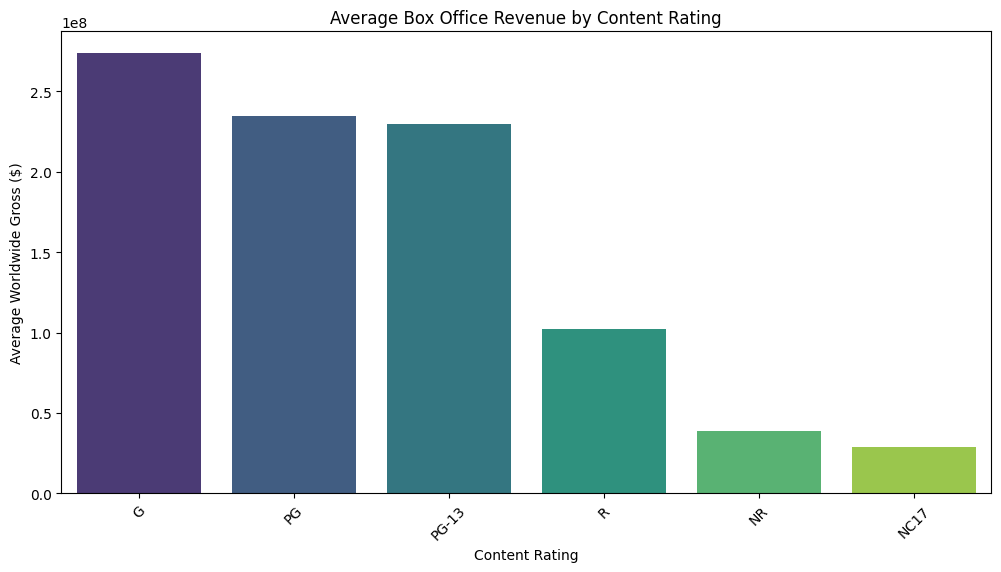

In [129]:
avg_revenue = df.groupby('content_rating')['Worldwide Gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_revenue.index, y=avg_revenue.values, palette='viridis')
plt.xlabel('Content Rating')
plt.ylabel('Average Worldwide Gross ($)')
plt.title('Average Box Office Revenue by Content Rating')
plt.xticks(rotation=45)
plt.show()

# highest content_rating

C:\Users\AL LEWAA\AppData\Local\Temp\ipykernel_13268\1214535406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='pastel')


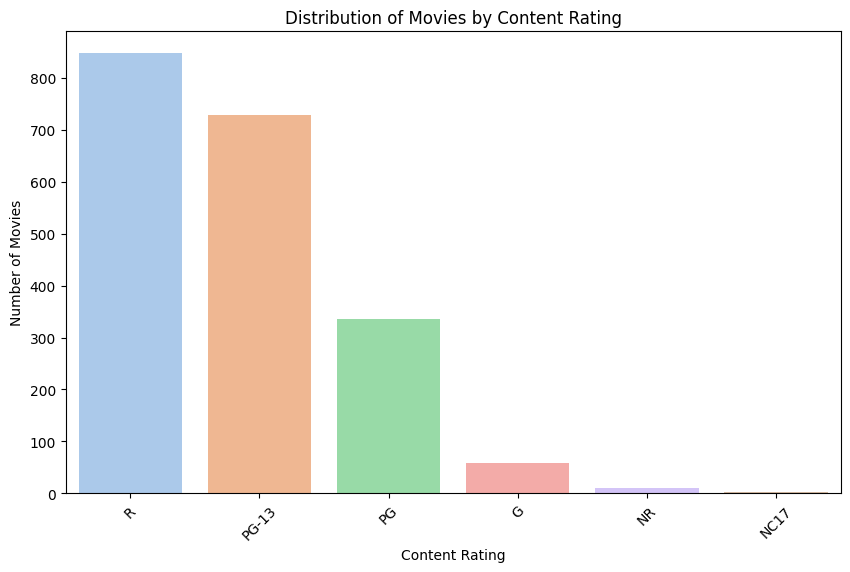

In [130]:
rating_counts = df['content_rating'].value_counts()

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='pastel')
plt.xlabel('Content Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Content Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

# Distribution of Worldwide Gross by Season

C:\Users\AL LEWAA\AppData\Local\Temp\ipykernel_13268\3201326063.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Worldwide Gross', data=season_avg, palette='coolwarm')


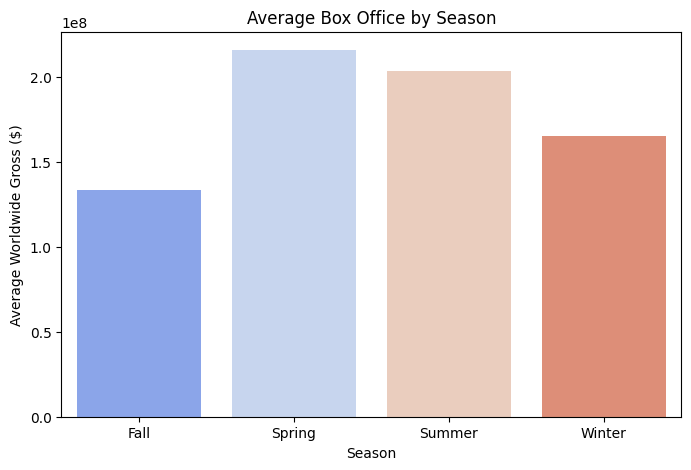

In [166]:
season_avg = df.groupby('Season')['Worldwide Gross'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Season', y='Worldwide Gross', data=season_avg, palette='coolwarm')
plt.ylabel("Average Worldwide Gross ($)")
plt.title("Average Box Office by Season")
plt.show()


# Seasonality of Movie Releases

C:\Users\AL LEWAA\AppData\Local\Temp\ipykernel_13268\2344865308.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Season', data=df, palette='pastel')


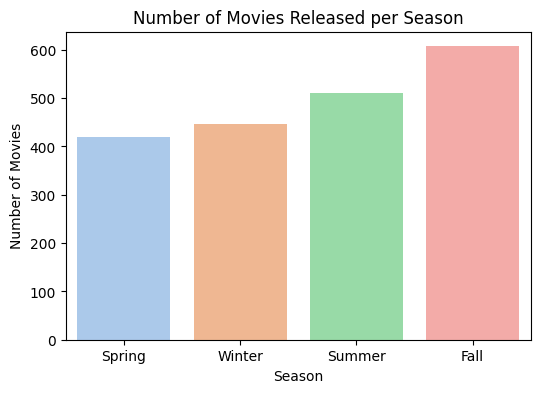

In [133]:
plt.figure(figsize=(6,4))
sns.countplot(x='Season', data=df, palette='pastel')
plt.title("Number of Movies Released per Season")
plt.xlabel("Season")
plt.ylabel("Number of Movies")
plt.show()


# Correlation Heatmap

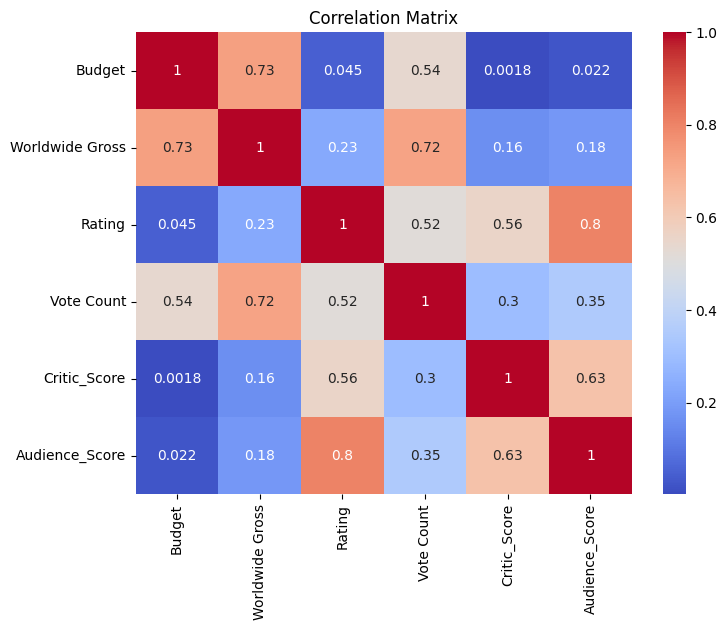

In [134]:
corr = df[['Budget', 'Worldwide Gross', 'Rating', 'Vote Count', 'Critic_Score', 'Audience_Score']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Question 1 What factors most strongly predict box office success â€” budget, cast popularity, or IMDb ratings? 

In [135]:

df['Budget'] = df['Budget'].replace('[\$,]', '', regex=True).astype(float)
df['Worldwide Gross'] = df['Worldwide Gross'].replace('[\$,]', '', regex=True).astype(float)


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\AL LEWAA\AppData\Local\Temp\ipykernel_13268\2378476132.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Budget'] = df['Budget'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\AL LEWAA\AppData\Local\Temp\ipykernel_13268\2378476132.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Worldwide Gross'] = df['Worldwide Gross'].replace('[\$,]', '', regex=True).astype(float)


In [136]:
analysis_df = df[['Budget', 'Worldwide Gross']]

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\AL LEWAA\AppData\Local\Temp\ipykernel_13268\493539238.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Budget'] = df['Budget'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\AL LEWAA\AppData\Local\Temp\ipykernel_13268\493539238.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['Worldwide Gross'] = df['Worldwide Gross'].replace('[\$,]', '', regex=True).astype(float)


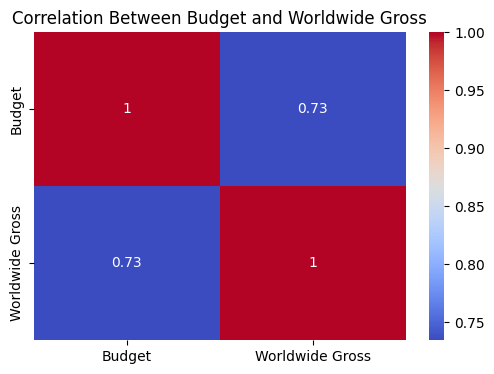

In [137]:
corr = analysis_df.corr()
df['Budget'] = df['Budget'].replace('[\$,]', '', regex=True).astype(float)
df['Worldwide Gross'] = df['Worldwide Gross'].replace('[\$,]', '', regex=True).astype(float)
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Budget and Worldwide Gross')
plt.show()



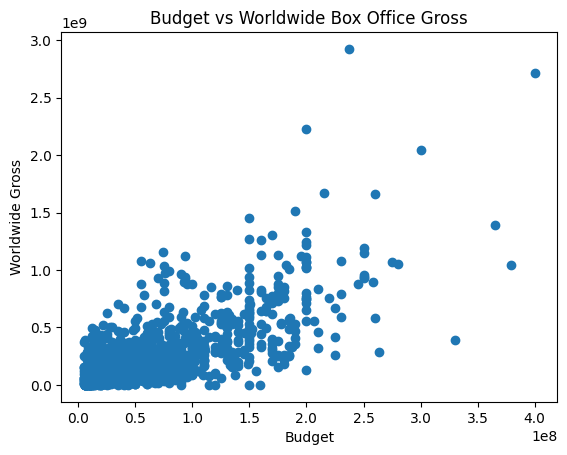

In [168]:
plt.figure()
plt.scatter(df["Budget"], df["Worldwide Gross"])
plt.xlabel("Budget")
plt.ylabel("Worldwide Gross")
plt.title("Budget vs Worldwide Box Office Gross")
plt.show()

c:\Users\AL LEWAA\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


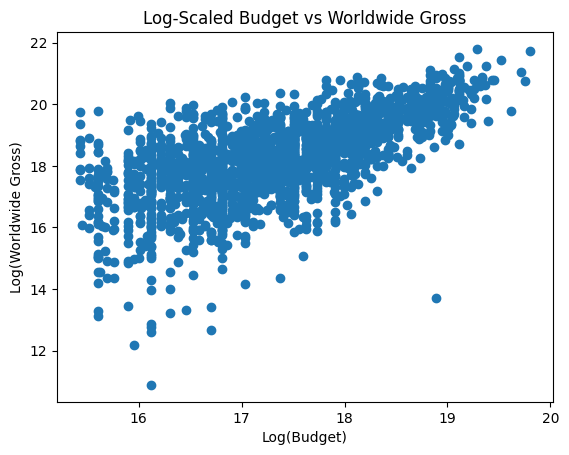

In [140]:
plt.figure()
plt.scatter(
    np.log(df["Budget"]),
    np.log(df["Worldwide Gross"])
)
plt.xlabel("Log(Budget)")
plt.ylabel("Log(Worldwide Gross)")
plt.title("Log-Scaled Budget vs Worldwide Gross")
plt.show()

In [141]:
# Features
X = df["Budget"].values
y = df["Worldwide Gross"].values

# ---- SIMPLE LINEAR REGRESSION ----
# y = m*x + b
m, b = np.polyfit(X, y, 1)

# Predictions
x_line = np.linspace(X.min(), X.max(), 300)
y_line = m * x_line + b

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

Slope (m): 3.6357901529764542
Intercept (b): -8141910.949241244


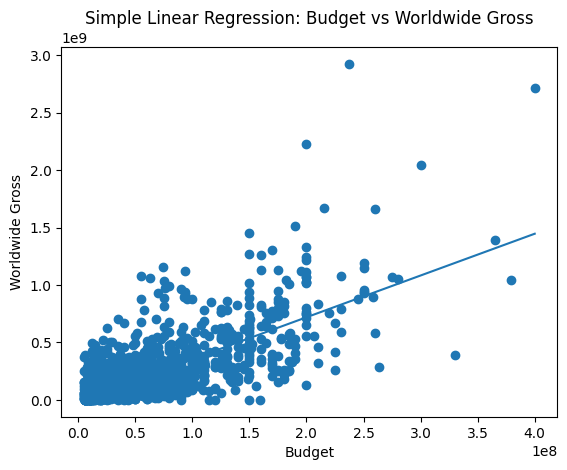

In [142]:
#PLOT 
plt.figure()
plt.scatter(X, y)
plt.plot(x_line, y_line)
plt.xlabel("Budget")
plt.ylabel("Worldwide Gross")
plt.title("Simple Linear Regression: Budget vs Worldwide Gross")
plt.show()

In [143]:
test_budgets = np.array([
    10_000_000,
    30_000_000,
    50_000_000,
    100_000_000,
    200_000_000
])

# Predictions
predicted_gross = m * test_budgets + b

# Show results
for budget, gross in zip(test_budgets, predicted_gross):
    print(f"Budget: ${budget:,.0f} → Predicted Gross: ${gross:,.0f}")

Budget: $10,000,000 → Predicted Gross: $28,215,991
Budget: $30,000,000 → Predicted Gross: $100,931,794
Budget: $50,000,000 → Predicted Gross: $173,647,597
Budget: $100,000,000 → Predicted Gross: $355,437,104
Budget: $200,000,000 → Predicted Gross: $719,016,120


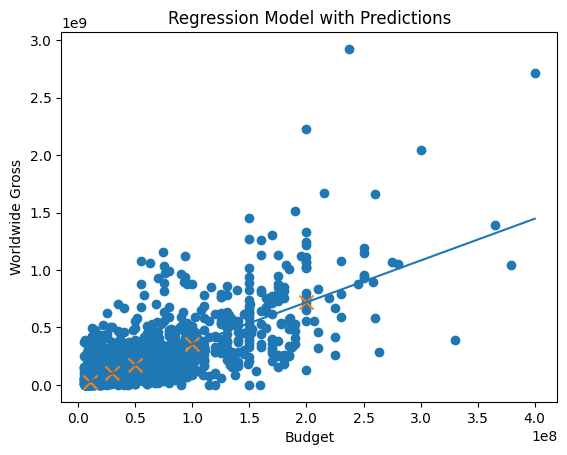

In [144]:
# Regression line
x_line = np.linspace(X.min(), X.max(), 300)
y_line = m * x_line + b

plt.figure()
plt.scatter(X, y)
plt.plot(x_line, y_line)
plt.scatter(test_budgets, predicted_gross, marker='x', s=100)
plt.xlabel("Budget")
plt.ylabel("Worldwide Gross")
plt.title("Regression Model with Predictions")
plt.show()


# Question 2: Do movies released in summer perform better financially than those in winter?

In [169]:

df['Month'] = df['Release Date'].dt.month

In [170]:
df['Worldwide Gross'] = (
    df['Worldwide Gross']
    .replace(r'[$,]', '', regex=True)
    .astype(float)
)

In [171]:
summer = df[df['Month'].isin([6, 7, 8])]['Worldwide Gross']
winter = df[df['Month'].isin([12, 1, 2])]['Worldwide Gross']

In [172]:
t_stat, p_value = ttest_ind(summer, winter, nan_policy='omit')

summer.mean(), winter.mean(), p_value

(np.float64(203680221.78082192),
 np.float64(164963453.24439463),
 np.float64(0.018641856828287062))

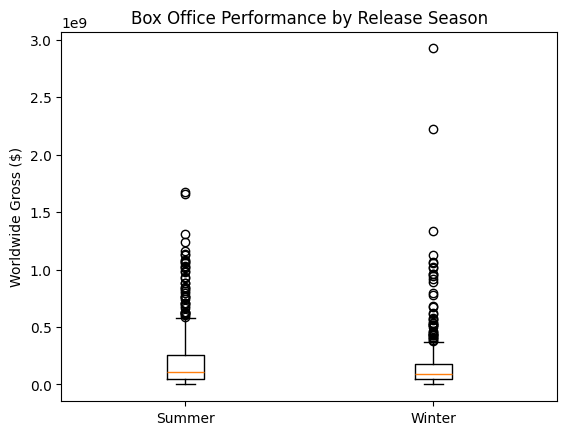

In [173]:
plt.boxplot([summer, winter], tick_labels=['Summer', 'Winter'])
plt.ylabel("Worldwide Gross ($)")
plt.title("Box Office Performance by Release Season")
plt.show()

In [174]:
print(f"Summer mean gross  ≈ ${summer.mean():,.0f}")
print(f"Winter mean gross  ≈ ${winter.mean():,.0f}")
print(f"p-value            ≈ {p_value:.5f}")

Summer mean gross  ≈ $203,680,222
Winter mean gross  ≈ $164,963,453
p-value            ≈ 0.01864


## Question 3:Is there a significant difference between critics’ and audience ratings across genres?


In [151]:
from scipy.stats import ttest_rel
df_merged = df.dropna(subset=['Critic_Score', 'Audience_Score'])

t, p_value = ttest_rel(df_merged['Critic_Score'], df_merged['Audience_Score'])

print(f"P-Value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference between Critic and Audience Scores.")
else:
    print("Conclusion: No significant difference found.")

P-Value: 4.914199698864254e-54
There is a significant difference between Critic and Audience Scores.


# Machine Learning Part (Extra)
## logistic regression 

#### general equation 

![alt text](0_QGl7lAEq2HKc6gAb.png)

#### sigmoid function

![alt text](1694183259537.png)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#PREPARE DATA FOR LOGISTIC REGRESSION
#convert Worldwide Gross to binary: 1 = high-grossing, 0 = low-grossing
threshold = df['Worldwide Gross'].median()
df['High_Gross'] = (df['Worldwide Gross'] > threshold).astype(int)








In [177]:
df.columns

Index(['Release Date', 'Title', 'Budget', 'Domestic Gross', 'Worldwide Gross',
       'Year', 'Rating', 'Vote Count', 'Language', 'Season', 'Critic_Score',
       'Audience_Score', 'runtime', 'genres', 'content_rating', 'Month',
       'High_Gross'],
      dtype='object')

In [201]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Season_Encoded'] = le.fit_transform(df['Season'])
df['content_rating_Encoded'] = le.fit_transform(df['content_rating'])



features = ['Budget', 'Rating', 'Vote Count', 'Critic_Score', 'Audience_Score','Season_Encoded','content_rating_Encoded']
ml_df = df[features + ['High_Gross']].dropna()

X = ml_df[features]
y = ml_df['High_Gross']


In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# LOGISTIC REGRESSION MODEL
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

![alt text](Confusion-matrix-with-the-formulas-of-precision-recall-accuracy-and-f1-score.jpg)

In [203]:
# EVALUATION
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))





Accuracy: 0.7808564231738035

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       201
           1       0.80      0.74      0.77       196

    accuracy                           0.78       397
   macro avg       0.78      0.78      0.78       397
weighted avg       0.78      0.78      0.78       397



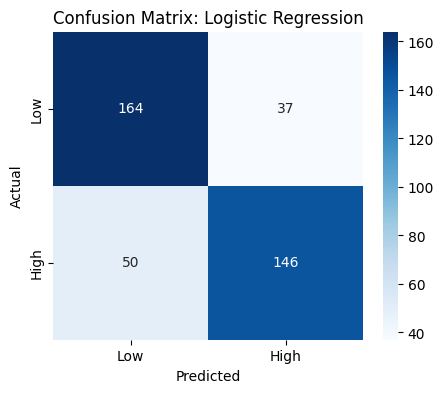

In [204]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

In [205]:
# Feature importance
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': log_model.coef_[0]})
print("\nFeature coefficients:\n", coef_df)


Feature coefficients:
                   Feature   Coefficient
0                  Budget  2.983606e-08
1                  Rating -7.264122e-03
2              Vote Count  4.156467e-04
3            Critic_Score  6.359406e-03
4          Audience_Score -4.366866e-02
5          Season_Encoded -3.980993e-04
6  content_rating_Encoded -7.017484e-03


# Q4: Can budget and ratings predict whether a movie becomes “High-Grossing”?

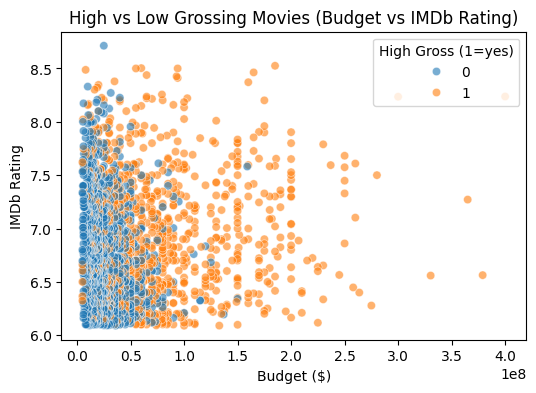

In [157]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Budget"], y=df["Rating"], hue=df["High_Gross"], alpha=0.6)
plt.title("High vs Low Grossing Movies (Budget vs IMDb Rating)")
plt.xlabel("Budget ($)")
plt.ylabel("IMDb Rating")
plt.legend(title="High Gross (1=yes)")
plt.show()


# Q5: What is the probability that a movie is High-Grossing based on the model?

Top 10 movies predicted to be high-grossing:
                                        Title    Year  High_Gross_Prob
56                            The Dark Knight  2008.0         1.000000
30                              Black Panther  2018.0         0.999997
579                                  Deadpool  2016.0         0.999991
240                          Django Unchained  2012.0         0.999980
76                                         Up  2009.0         0.999975
124                             Batman Begins  2005.0         0.999953
479                                The Matrix  1999.0         0.999952
354                            Shutter Island  2010.0         0.999947
237   Harry Potter and the Chamber of Secrets  2002.0         0.999926
1221                 The Shawshank Redemption  1994.0         0.999893


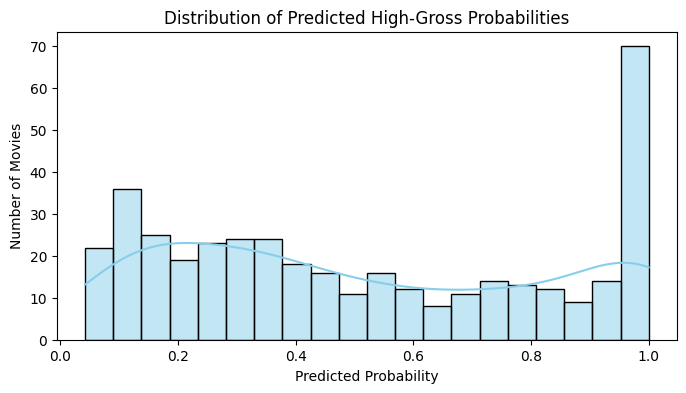

In [ ]:
# Prepare a DataFrame for test results including Title
# Use the original df (full dataset) to get the Title
X_test_indices = X_test.index  # indices of test rows in ml_df
result_df = df.loc[X_test_indices, ["Title", "Year"]].copy()  # use original df for Title

# Compute predicted probabilities for High_Gross
probs = log_model.predict_proba(X_test)[:, 1]
result_df["High_Gross_Prob"] = probs

# Show top 10 predicted high-grossing movies
top_prob_movies = result_df.sort_values(by="High_Gross_Prob", ascending=False).head(10)
print("Top 10 movies predicted to be high-grossing:")
print(top_prob_movies)

#visualize probability distribution
plt.figure(figsize=(8,4))
sns.histplot(result_df["High_Gross_Prob"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Predicted High-Gross Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Number of Movies")
plt.show()


In [207]:
print(ml_df.columns.tolist())


['Budget', 'Rating', 'Vote Count', 'Critic_Score', 'Audience_Score', 'Season_Encoded', 'content_rating_Encoded', 'High_Gross']
